In [10]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [2]:
data = pd.read_csv('../../trainingandtestdata/training.1600000.processed.noemoticon.csv', engine='python', names=['score', 'id', 'date', 'query', 'user', 'text'])

In [3]:
data

,score,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.1, random_state=42)

In [5]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
train['text'].head()

0           just saw your picture and my heart melted 
1    @ethanonly it's during the uni exam period   #...
2                    Jammin To Capital In My Garde  xx
3    Talking to Mike on skype.. The greatest thing ...
4    Gosh, Don't you hate those guys who are just s...
Name: text, dtype: object

In [6]:
train['score'] = train[['score']].replace({4: 1})

In [7]:
def words_in_text(words, texts):
    '''
    words: list of str
    text: pd series of texts
    '''
    indicator_array = np.zeros((len(texts), len(words)))
    for idt in range(len(texts)):
        for idw in range(len(words)):
            if words[idw] in str(texts[idt]):
                indicator_array[idt, idw] = 1
    return indicator_array

In [8]:
def featurize(data, size=len(data)):
    
    # Get avg len of words
    num_words = data['text'].head(size).str.split().apply(len)
    num_chars = data['text'].head(size).str.len()
    avg_word_len = np.array(num_chars / num_words)
    avg_word_len = avg_word_len.reshape((len(avg_word_len), 1))
    
    # One hot encoding for words in tweet
    words = words_in_text(['upset', 'bad', 'love', 'hate', 'why', 'stupid'], data['text'].head(size))
    
    # think of another thing 

    return np.hstack([avg_word_len, words])

training accuracy for 100 samples: 0.65
validation accuracy for 100 samples: 0.2341
*********************************
training accuracy for 500 samples: 0.626
validation accuracy for 500 samples: 0.2546
*********************************
training accuracy for 1000 samples: 0.599
validation accuracy for 1000 samples: 0.2713
*********************************
training accuracy for 3000 samples: 0.6026666666666667
validation accuracy for 3000 samples: 0.2963
*********************************
training accuracy for 5000 samples: 0.6052
validation accuracy for 5000 samples: 0.3165
*********************************
training accuracy for 7000 samples: 0.602
validation accuracy for 7000 samples: 0.3344
*********************************
training accuracy for 10000 samples: 0.6014
validation accuracy for 10000 samples: 0.348
*********************************
training accuracy for 30000 samples: 0.5932
validation accuracy for 30000 samples: 0.3434
*********************************
training accuracy 

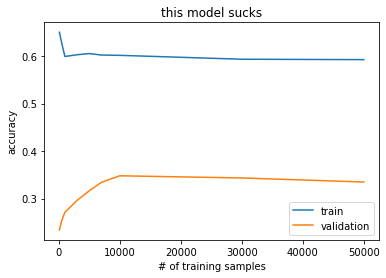

In [9]:
n = [100, 500, 1000, 3000, 5000, 7000, 10000, 30000, 50000] #number of samples to check
train_acc = []
valid_acc = []

for iters in n:
    
    X_train = featurize(train, iters)
    Y_train = train['score'].head(iters)

    # from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import LogisticRegression


    model = LogisticRegression()
    model.fit(X_train, Y_train)

    training_accuracy = model.score(X_train, Y_train)
    
    # calculate precision, recall, threshold
    
    validation_accuracy = model.score(featurize(test, 10000), test['score'].head(10000))
    
    train_acc.append(training_accuracy)
    valid_acc.append(validation_accuracy)
    
    print(f"training accuracy for {iters} samples: {training_accuracy}")
    print(f"validation accuracy for {iters} samples: {validation_accuracy}")
    print('*********************************')

#visualization
plt.plot(n, train_acc, label='train')
plt.plot(n, valid_acc, label='validation')
plt.xlabel('# of training samples')
plt.ylabel('accuracy')
plt.legend()
plt.title('this model sucks');